In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('/Applications/Repos/Repo/expedition/Python/Linear/height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


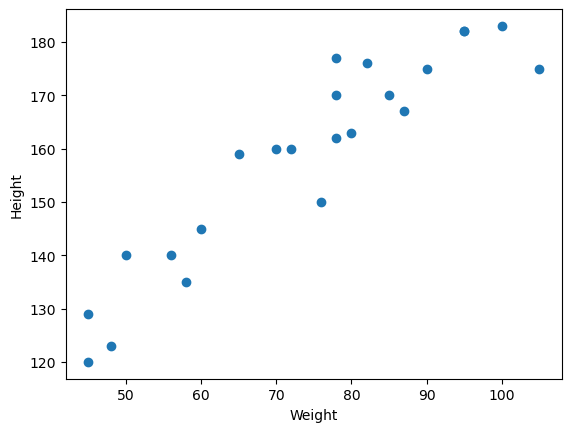

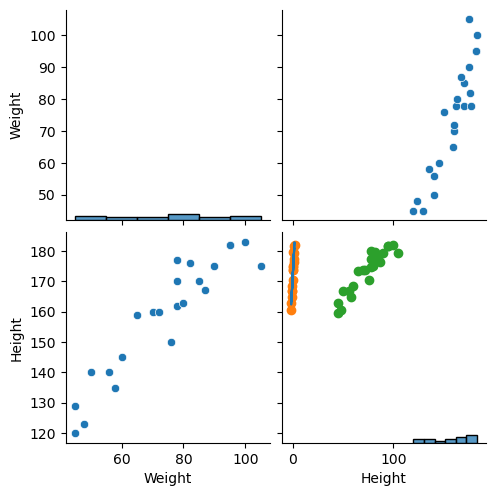

In [25]:
# scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [7]:
# corellation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [8]:
# seaborn for visualization

import seaborn as sns

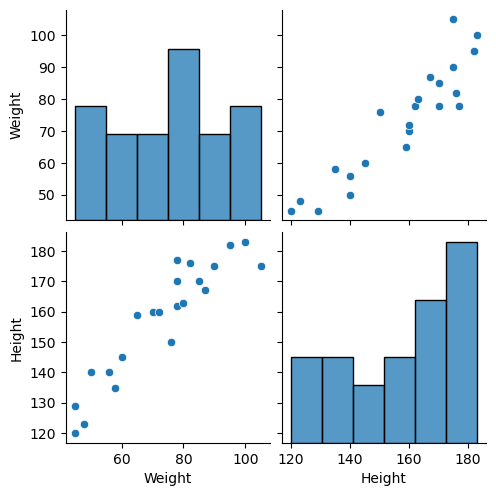

In [26]:
sns.pairplot(df)
plt.show()

In [10]:
# Independent and Dependent features


X = df[['Weight']]   # independent feature must be a 2 dim array to act as a df
Y = df['Height']  # this can be in series or 1 dim array

In [11]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
# standardization

from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [16]:
# apply linear regression

from sklearn.linear_model import LinearRegression


In [17]:
regression = LinearRegression()

regression.fit(X_train,Y_train)

LinearRegression()

In [18]:
print('Slope:',regression.coef_)
print('Intercept:', regression.intercept_)

Slope: [17.2982057]
Intercept: 156.47058823529412


Slope: [17.2982057]
Intercept: 156.47058823529412


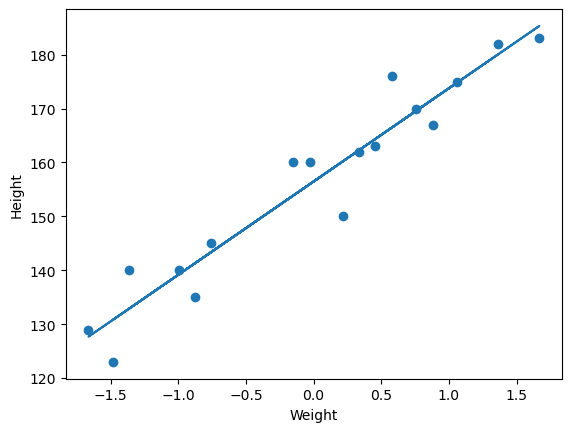

In [27]:
# plot the training data best fit line

plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))
plt.xlabel('Weight')
plt.ylabel('Height')
print('Slope:',regression.coef_)
print('Intercept:', regression.intercept_)
plt.show()



In [20]:
# predection on test data

y_pred = regression.predict(X_test)

In [21]:
# performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [23]:
# R2 score

from sklearn.metrics import r2_score

score = r2_score(Y_test,y_pred)
print(score)

0.7360826717981276


In [24]:
# predection for new data

regression.predict(scaler.transform([[72]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])